In [ ]:
# Part B Question 3 ----- Completed!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers, optimizers

In [2]:
NUM_CLASSES = 7

epochs = 1000
batch_size = 8
num_neurons = 50
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

trainX, trainY = X_data, Y_data

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

# # Split data into 70:30 ratio for training and testing: (280, 7) (280, 1) (120, 7) (120, 1)
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.3, random_state=seed)

In [4]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(280, 7) (120, 7) (280, 1) (120, 1)


In [5]:
# From part 2, the optimal number of features is 6 and the 2 columns to be dropped are [6]
# cols_to_drop = [6]

# trainX = np.delete(trainX, cols_to_drop, 1)
# testX = np.delete(testX, cols_to_drop, 1)

In [5]:
reg = regularizers.l2(10e-3)
opt = keras.optimizers.SGD(learning_rate=10e-3)

In [6]:
# create a 3 layer network without dropouts
three_without_dropouts = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                        keras.layers.Dense(1, activation='linear')])

# create a 4 layer network with and without dropouts
four_with_dropouts = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dropout(rate=0.2),
                                       keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dropout(rate=0.2),
                                       keras.layers.Dense(1, activation='linear')])

four_without_dropouts = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dense(1, activation='linear')])

# create a 5 layer network with and without dropouts
five_with_dropouts = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dropout(rate=0.2),
                                       keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dropout(rate=0.2),
                                       keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                       keras.layers.Dropout(rate=0.2),
                                       keras.layers.Dense(1, activation='linear')])

five_without_dropouts = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                          keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                          keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                          keras.layers.Dense(1, activation='linear')])

all_models = [three_without_dropouts, four_with_dropouts, four_without_dropouts, five_with_dropouts, five_without_dropouts]

histories={}

for i, model in enumerate(all_models):
    model.compile(optimizer=opt, loss=keras.losses.MeanSquaredError(), metrics=['mse'])

    # learn the network without early stopping
    histories[i] = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY),
                            verbose = 2)

Epoch 1/1000
35/35 - 0s - loss: 0.3133 - mse: 0.2013 - val_loss: 0.1804 - val_mse: 0.0692
Epoch 2/1000
35/35 - 0s - loss: 0.1541 - mse: 0.0437 - val_loss: 0.1575 - val_mse: 0.0481
Epoch 3/1000
35/35 - 0s - loss: 0.1390 - mse: 0.0304 - val_loss: 0.1435 - val_mse: 0.0357
Epoch 4/1000
35/35 - 0s - loss: 0.1294 - mse: 0.0225 - val_loss: 0.1341 - val_mse: 0.0280
Epoch 5/1000
35/35 - 0s - loss: 0.1232 - mse: 0.0179 - val_loss: 0.1274 - val_mse: 0.0229
Epoch 6/1000
35/35 - 0s - loss: 0.1186 - mse: 0.0149 - val_loss: 0.1234 - val_mse: 0.0205
Epoch 7/1000
35/35 - 0s - loss: 0.1155 - mse: 0.0133 - val_loss: 0.1192 - val_mse: 0.0178
Epoch 8/1000
35/35 - 0s - loss: 0.1125 - mse: 0.0118 - val_loss: 0.1160 - val_mse: 0.0161
Epoch 9/1000
35/35 - 0s - loss: 0.1100 - mse: 0.0107 - val_loss: 0.1133 - val_mse: 0.0148
Epoch 10/1000
35/35 - 0s - loss: 0.1077 - mse: 0.0099 - val_loss: 0.1108 - val_mse: 0.0137
Epoch 11/1000
35/35 - 0s - loss: 0.1057 - mse: 0.0093 - val_loss: 0.1087 - val_mse: 0.0131
Epoch 12

35/35 - 0s - loss: 0.0348 - mse: 0.0038 - val_loss: 0.0361 - val_mse: 0.0054
Epoch 92/1000
35/35 - 0s - loss: 0.0344 - mse: 0.0038 - val_loss: 0.0357 - val_mse: 0.0054
Epoch 93/1000
35/35 - 0s - loss: 0.0339 - mse: 0.0038 - val_loss: 0.0352 - val_mse: 0.0053
Epoch 94/1000
35/35 - 0s - loss: 0.0335 - mse: 0.0038 - val_loss: 0.0348 - val_mse: 0.0053
Epoch 95/1000
35/35 - 0s - loss: 0.0331 - mse: 0.0038 - val_loss: 0.0343 - val_mse: 0.0053
Epoch 96/1000
35/35 - 0s - loss: 0.0327 - mse: 0.0038 - val_loss: 0.0339 - val_mse: 0.0052
Epoch 97/1000
35/35 - 0s - loss: 0.0323 - mse: 0.0038 - val_loss: 0.0335 - val_mse: 0.0052
Epoch 98/1000
35/35 - 0s - loss: 0.0318 - mse: 0.0038 - val_loss: 0.0331 - val_mse: 0.0053
Epoch 99/1000
35/35 - 0s - loss: 0.0314 - mse: 0.0038 - val_loss: 0.0327 - val_mse: 0.0052
Epoch 100/1000
35/35 - 0s - loss: 0.0311 - mse: 0.0038 - val_loss: 0.0323 - val_mse: 0.0052
Epoch 101/1000
35/35 - 0s - loss: 0.0306 - mse: 0.0037 - val_loss: 0.0320 - val_mse: 0.0053
Epoch 102/1

Epoch 181/1000
35/35 - 0s - loss: 0.0124 - mse: 0.0034 - val_loss: 0.0135 - val_mse: 0.0045
Epoch 182/1000
35/35 - 0s - loss: 0.0123 - mse: 0.0034 - val_loss: 0.0133 - val_mse: 0.0045
Epoch 183/1000
35/35 - 0s - loss: 0.0122 - mse: 0.0034 - val_loss: 0.0133 - val_mse: 0.0046
Epoch 184/1000
35/35 - 0s - loss: 0.0120 - mse: 0.0034 - val_loss: 0.0132 - val_mse: 0.0046
Epoch 185/1000
35/35 - 0s - loss: 0.0119 - mse: 0.0034 - val_loss: 0.0130 - val_mse: 0.0046
Epoch 186/1000
35/35 - 0s - loss: 0.0118 - mse: 0.0034 - val_loss: 0.0129 - val_mse: 0.0045
Epoch 187/1000
35/35 - 0s - loss: 0.0117 - mse: 0.0034 - val_loss: 0.0128 - val_mse: 0.0046
Epoch 188/1000
35/35 - 0s - loss: 0.0116 - mse: 0.0034 - val_loss: 0.0126 - val_mse: 0.0045
Epoch 189/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0034 - val_loss: 0.0126 - val_mse: 0.0046
Epoch 190/1000
35/35 - 0s - loss: 0.0114 - mse: 0.0034 - val_loss: 0.0125 - val_mse: 0.0046
Epoch 191/1000
35/35 - 0s - loss: 0.0112 - mse: 0.0034 - val_loss: 0.0124 - val_

35/35 - 0s - loss: 0.0062 - mse: 0.0033 - val_loss: 0.0073 - val_mse: 0.0045
Epoch 271/1000
35/35 - 0s - loss: 0.0061 - mse: 0.0033 - val_loss: 0.0073 - val_mse: 0.0045
Epoch 272/1000
35/35 - 0s - loss: 0.0061 - mse: 0.0032 - val_loss: 0.0073 - val_mse: 0.0044
Epoch 273/1000
35/35 - 0s - loss: 0.0061 - mse: 0.0033 - val_loss: 0.0072 - val_mse: 0.0044
Epoch 274/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0033 - val_loss: 0.0072 - val_mse: 0.0045
Epoch 275/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0033 - val_loss: 0.0072 - val_mse: 0.0045
Epoch 276/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0033 - val_loss: 0.0071 - val_mse: 0.0044
Epoch 277/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0032 - val_loss: 0.0071 - val_mse: 0.0044
Epoch 278/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0033 - val_loss: 0.0071 - val_mse: 0.0045
Epoch 279/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0032 - val_loss: 0.0070 - val_mse: 0.0044
Epoch 280/1000
35/35 - 0s - loss: 0.0058 - mse: 0.0033 - val_loss: 0.0070 - val_mse: 0.0045
Epo

Epoch 360/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0056 - val_mse: 0.0044
Epoch 361/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 362/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 363/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 364/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0055 - val_mse: 0.0044
Epoch 365/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 366/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0032 - val_loss: 0.0054 - val_mse: 0.0043
Epoch 367/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0033 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 368/1000
35/35 - 0s - loss: 0.0043 - mse: 0.0032 - val_loss: 0.0054 - val_mse: 0.0043
Epoch 369/1000
35/35 - 0s - loss: 0.0043 - mse: 0.0033 - val_loss: 0.0054 - val_mse: 0.0044
Epoch 370/1000
35/35 - 0s - loss: 0.0043 - mse: 0.0032 - val_loss: 0.0055 - val_

35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 450/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 451/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0044
Epoch 452/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 453/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 454/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 455/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 456/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0049 - val_mse: 0.0043
Epoch 457/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0049 - val_mse: 0.0043
Epoch 458/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0051 - val_mse: 0.0044
Epoch 459/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0050 - val_mse: 0.0043
Epo

Epoch 539/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 540/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 541/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 542/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 543/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 544/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 545/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 546/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 547/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 548/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 549/1000
35/35 - 0s - loss: 0.0038 - mse: 0.0033 - val_loss: 0.0048 - val_

35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 629/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0044
Epoch 630/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 631/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 632/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 633/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 634/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0044
Epoch 635/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 636/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0043
Epoch 637/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 638/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0044
Epo

Epoch 718/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 719/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 720/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 721/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 722/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0044
Epoch 723/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 724/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0048 - val_mse: 0.0044
Epoch 725/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 726/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 727/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 728/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_

35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 808/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 809/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 810/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 811/1000
35/35 - 0s - loss: 0.0037 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 812/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 813/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 814/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 815/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 816/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 817/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0042
Epo

Epoch 897/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 898/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 899/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 900/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 901/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 902/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 903/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 904/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0047 - val_mse: 0.0044
Epoch 905/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 906/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 907/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_

35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 987/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 988/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 989/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 990/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epoch 991/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 992/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 993/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 994/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 995/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0043
Epoch 996/1000
35/35 - 0s - loss: 0.0036 - mse: 0.0033 - val_loss: 0.0047 - val_mse: 0.0043
Epo

35/35 - 0s - loss: 0.2113 - mse: 0.0062 - val_loss: 0.2084 - val_mse: 0.0048
Epoch 77/1000
35/35 - 0s - loss: 0.2088 - mse: 0.0065 - val_loss: 0.2056 - val_mse: 0.0048
Epoch 78/1000
35/35 - 0s - loss: 0.2054 - mse: 0.0060 - val_loss: 0.2028 - val_mse: 0.0048
Epoch 79/1000
35/35 - 0s - loss: 0.2026 - mse: 0.0059 - val_loss: 0.2001 - val_mse: 0.0048
Epoch 80/1000
35/35 - 0s - loss: 0.2005 - mse: 0.0065 - val_loss: 0.1974 - val_mse: 0.0048
Epoch 81/1000
35/35 - 0s - loss: 0.1970 - mse: 0.0057 - val_loss: 0.1947 - val_mse: 0.0048
Epoch 82/1000
35/35 - 0s - loss: 0.1947 - mse: 0.0060 - val_loss: 0.1921 - val_mse: 0.0048
Epoch 83/1000
35/35 - 0s - loss: 0.1919 - mse: 0.0058 - val_loss: 0.1895 - val_mse: 0.0048
Epoch 84/1000
35/35 - 0s - loss: 0.1891 - mse: 0.0056 - val_loss: 0.1869 - val_mse: 0.0048
Epoch 85/1000
35/35 - 0s - loss: 0.1868 - mse: 0.0058 - val_loss: 0.1844 - val_mse: 0.0048
Epoch 86/1000
35/35 - 0s - loss: 0.1839 - mse: 0.0055 - val_loss: 0.1820 - val_mse: 0.0047
Epoch 87/1000

Epoch 166/1000
35/35 - 0s - loss: 0.0650 - mse: 0.0055 - val_loss: 0.0637 - val_mse: 0.0046
Epoch 167/1000
35/35 - 0s - loss: 0.0638 - mse: 0.0051 - val_loss: 0.0629 - val_mse: 0.0046
Epoch 168/1000
35/35 - 0s - loss: 0.0628 - mse: 0.0049 - val_loss: 0.0621 - val_mse: 0.0046
Epoch 169/1000
35/35 - 0s - loss: 0.0627 - mse: 0.0055 - val_loss: 0.0614 - val_mse: 0.0046
Epoch 170/1000
35/35 - 0s - loss: 0.0614 - mse: 0.0051 - val_loss: 0.0606 - val_mse: 0.0046
Epoch 171/1000
35/35 - 0s - loss: 0.0608 - mse: 0.0052 - val_loss: 0.0598 - val_mse: 0.0046
Epoch 172/1000
35/35 - 0s - loss: 0.0596 - mse: 0.0047 - val_loss: 0.0591 - val_mse: 0.0046
Epoch 173/1000
35/35 - 0s - loss: 0.0594 - mse: 0.0053 - val_loss: 0.0583 - val_mse: 0.0046
Epoch 174/1000
35/35 - 0s - loss: 0.0590 - mse: 0.0056 - val_loss: 0.0576 - val_mse: 0.0046
Epoch 175/1000
35/35 - 0s - loss: 0.0578 - mse: 0.0051 - val_loss: 0.0569 - val_mse: 0.0045
Epoch 176/1000
35/35 - 0s - loss: 0.0574 - mse: 0.0054 - val_loss: 0.0562 - val_

35/35 - 0s - loss: 0.0234 - mse: 0.0048 - val_loss: 0.0229 - val_mse: 0.0044
Epoch 256/1000
35/35 - 0s - loss: 0.0234 - mse: 0.0051 - val_loss: 0.0227 - val_mse: 0.0044
Epoch 257/1000
35/35 - 0s - loss: 0.0230 - mse: 0.0049 - val_loss: 0.0224 - val_mse: 0.0044
Epoch 258/1000
35/35 - 0s - loss: 0.0228 - mse: 0.0049 - val_loss: 0.0222 - val_mse: 0.0044
Epoch 259/1000
35/35 - 0s - loss: 0.0226 - mse: 0.0049 - val_loss: 0.0220 - val_mse: 0.0044
Epoch 260/1000
35/35 - 0s - loss: 0.0225 - mse: 0.0051 - val_loss: 0.0218 - val_mse: 0.0044
Epoch 261/1000
35/35 - 0s - loss: 0.0222 - mse: 0.0050 - val_loss: 0.0216 - val_mse: 0.0044
Epoch 262/1000
35/35 - 0s - loss: 0.0223 - mse: 0.0053 - val_loss: 0.0213 - val_mse: 0.0044
Epoch 263/1000
35/35 - 0s - loss: 0.0218 - mse: 0.0050 - val_loss: 0.0212 - val_mse: 0.0044
Epoch 264/1000
35/35 - 0s - loss: 0.0218 - mse: 0.0051 - val_loss: 0.0210 - val_mse: 0.0044
Epoch 265/1000
35/35 - 0s - loss: 0.0214 - mse: 0.0050 - val_loss: 0.0208 - val_mse: 0.0044
Epo

Epoch 345/1000
35/35 - 0s - loss: 0.0116 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0044
Epoch 346/1000
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0045
Epoch 347/1000
35/35 - 0s - loss: 0.0116 - mse: 0.0050 - val_loss: 0.0110 - val_mse: 0.0044
Epoch 348/1000
35/35 - 0s - loss: 0.0124 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0044
Epoch 349/1000
35/35 - 0s - loss: 0.0117 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0045
Epoch 350/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0051 - val_loss: 0.0109 - val_mse: 0.0045
Epoch 351/1000
35/35 - 0s - loss: 0.0114 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0045
Epoch 352/1000
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0107 - val_mse: 0.0044
Epoch 353/1000
35/35 - 0s - loss: 0.0109 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0044
Epoch 354/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0044
Epoch 355/1000
35/35 - 0s - loss: 0.0112 - mse: 0.0050 - val_loss: 0.0106 - val_

Epoch 435/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0051 - val_loss: 0.0078 - val_mse: 0.0044
Epoch 436/1000
35/35 - 0s - loss: 0.0085 - mse: 0.0052 - val_loss: 0.0078 - val_mse: 0.0045
Epoch 437/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0048 - val_loss: 0.0077 - val_mse: 0.0045
Epoch 438/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0052 - val_loss: 0.0077 - val_mse: 0.0045
Epoch 439/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0048 - val_loss: 0.0077 - val_mse: 0.0045
Epoch 440/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0047 - val_loss: 0.0077 - val_mse: 0.0045
Epoch 441/1000
35/35 - 0s - loss: 0.0080 - mse: 0.0048 - val_loss: 0.0077 - val_mse: 0.0045
Epoch 442/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0050 - val_loss: 0.0076 - val_mse: 0.0045
Epoch 443/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0047 - val_loss: 0.0076 - val_mse: 0.0045
Epoch 444/1000
35/35 - 0s - loss: 0.0083 - mse: 0.0051 - val_loss: 0.0076 - val_mse: 0.0045
Epoch 445/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0055 - val_loss: 0.0076 - val_

35/35 - 0s - loss: 0.0070 - mse: 0.0048 - val_loss: 0.0068 - val_mse: 0.0045
Epoch 525/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0050 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 526/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0051 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 527/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0050 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 528/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0051 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 529/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0050 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 530/1000
35/35 - 0s - loss: 0.0070 - mse: 0.0048 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 531/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0050 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 532/1000
35/35 - 0s - loss: 0.0068 - mse: 0.0046 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 533/1000
35/35 - 0s - loss: 0.0076 - mse: 0.0054 - val_loss: 0.0067 - val_mse: 0.0045
Epoch 534/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0051 - val_loss: 0.0067 - val_mse: 0.0045
Epo

Epoch 614/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0052 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 615/1000
35/35 - 0s - loss: 0.0069 - mse: 0.0050 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 616/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0047 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 617/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0053 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 618/1000
35/35 - 0s - loss: 0.0070 - mse: 0.0051 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 619/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0052 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 620/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0054 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 621/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0048 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 622/1000
35/35 - 0s - loss: 0.0074 - mse: 0.0055 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 623/1000
35/35 - 0s - loss: 0.0069 - mse: 0.0050 - val_loss: 0.0064 - val_mse: 0.0045
Epoch 624/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0048 - val_loss: 0.0064 - val_

35/35 - 0s - loss: 0.0067 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 704/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 705/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 706/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0053 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 707/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0050 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 708/1000
35/35 - 0s - loss: 0.0069 - mse: 0.0052 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 709/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0048 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 710/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 711/1000
35/35 - 0s - loss: 0.0068 - mse: 0.0051 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 712/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0045
Epoch 713/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0047 - val_loss: 0.0062 - val_mse: 0.0045
Epo

Epoch 793/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0050 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 794/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 795/1000
35/35 - 0s - loss: 0.0064 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 796/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 797/1000
35/35 - 0s - loss: 0.0069 - mse: 0.0052 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 798/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0047 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 799/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0047 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 800/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 801/1000
35/35 - 0s - loss: 0.0062 - mse: 0.0045 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 802/1000
35/35 - 0s - loss: 0.0064 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0045
Epoch 803/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0050 - val_loss: 0.0061 - val_

35/35 - 0s - loss: 0.0066 - mse: 0.0050 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 883/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0048 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 884/1000
35/35 - 0s - loss: 0.0064 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 885/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0052 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 886/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0050 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 887/1000
35/35 - 0s - loss: 0.0062 - mse: 0.0046 - val_loss: 0.0060 - val_mse: 0.0045
Epoch 888/1000
35/35 - 0s - loss: 0.0067 - mse: 0.0051 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 889/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 890/1000
35/35 - 0s - loss: 0.0062 - mse: 0.0046 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 891/1000
35/35 - 0s - loss: 0.0064 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 892/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0050 - val_loss: 0.0060 - val_mse: 0.0044
Epo

Epoch 972/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 973/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 974/1000
35/35 - 0s - loss: 0.0061 - mse: 0.0046 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 975/1000
35/35 - 0s - loss: 0.0062 - mse: 0.0047 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 976/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 977/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0051 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 978/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0051 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 979/1000
35/35 - 0s - loss: 0.0065 - mse: 0.0051 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 980/1000
35/35 - 0s - loss: 0.0068 - mse: 0.0054 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 981/1000
35/35 - 0s - loss: 0.0066 - mse: 0.0051 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 982/1000
35/35 - 0s - loss: 0.0063 - mse: 0.0048 - val_loss: 0.0059 - val_

Epoch 62/1000
35/35 - 0s - loss: 0.2652 - mse: 0.0038 - val_loss: 0.2646 - val_mse: 0.0051
Epoch 63/1000
35/35 - 0s - loss: 0.2616 - mse: 0.0038 - val_loss: 0.2611 - val_mse: 0.0051
Epoch 64/1000
35/35 - 0s - loss: 0.2580 - mse: 0.0038 - val_loss: 0.2575 - val_mse: 0.0051
Epoch 65/1000
35/35 - 0s - loss: 0.2544 - mse: 0.0038 - val_loss: 0.2540 - val_mse: 0.0051
Epoch 66/1000
35/35 - 0s - loss: 0.2510 - mse: 0.0037 - val_loss: 0.2505 - val_mse: 0.0050
Epoch 67/1000
35/35 - 0s - loss: 0.2475 - mse: 0.0037 - val_loss: 0.2471 - val_mse: 0.0050
Epoch 68/1000
35/35 - 0s - loss: 0.2441 - mse: 0.0037 - val_loss: 0.2437 - val_mse: 0.0050
Epoch 69/1000
35/35 - 0s - loss: 0.2408 - mse: 0.0037 - val_loss: 0.2403 - val_mse: 0.0049
Epoch 70/1000
35/35 - 0s - loss: 0.2375 - mse: 0.0037 - val_loss: 0.2371 - val_mse: 0.0050
Epoch 71/1000
35/35 - 0s - loss: 0.2343 - mse: 0.0037 - val_loss: 0.2339 - val_mse: 0.0050
Epoch 72/1000
35/35 - 0s - loss: 0.2311 - mse: 0.0037 - val_loss: 0.2307 - val_mse: 0.0049

Epoch 152/1000
35/35 - 0s - loss: 0.0787 - mse: 0.0036 - val_loss: 0.0788 - val_mse: 0.0042
Epoch 153/1000
35/35 - 0s - loss: 0.0777 - mse: 0.0036 - val_loss: 0.0778 - val_mse: 0.0042
Epoch 154/1000
35/35 - 0s - loss: 0.0767 - mse: 0.0036 - val_loss: 0.0768 - val_mse: 0.0042
Epoch 155/1000
35/35 - 0s - loss: 0.0757 - mse: 0.0036 - val_loss: 0.0758 - val_mse: 0.0042
Epoch 156/1000
35/35 - 0s - loss: 0.0747 - mse: 0.0036 - val_loss: 0.0749 - val_mse: 0.0042
Epoch 157/1000
35/35 - 0s - loss: 0.0738 - mse: 0.0036 - val_loss: 0.0739 - val_mse: 0.0043
Epoch 158/1000
35/35 - 0s - loss: 0.0728 - mse: 0.0036 - val_loss: 0.0729 - val_mse: 0.0042
Epoch 159/1000
35/35 - 0s - loss: 0.0719 - mse: 0.0036 - val_loss: 0.0720 - val_mse: 0.0043
Epoch 160/1000
35/35 - 0s - loss: 0.0710 - mse: 0.0036 - val_loss: 0.0711 - val_mse: 0.0042
Epoch 161/1000
35/35 - 0s - loss: 0.0700 - mse: 0.0036 - val_loss: 0.0702 - val_mse: 0.0043
Epoch 162/1000
35/35 - 0s - loss: 0.0691 - mse: 0.0036 - val_loss: 0.0693 - val_

35/35 - 0s - loss: 0.0266 - mse: 0.0038 - val_loss: 0.0269 - val_mse: 0.0042
Epoch 242/1000
35/35 - 0s - loss: 0.0263 - mse: 0.0038 - val_loss: 0.0266 - val_mse: 0.0042
Epoch 243/1000
35/35 - 0s - loss: 0.0260 - mse: 0.0038 - val_loss: 0.0263 - val_mse: 0.0042
Epoch 244/1000
35/35 - 0s - loss: 0.0257 - mse: 0.0038 - val_loss: 0.0260 - val_mse: 0.0042
Epoch 245/1000
35/35 - 0s - loss: 0.0255 - mse: 0.0038 - val_loss: 0.0258 - val_mse: 0.0042
Epoch 246/1000
35/35 - 0s - loss: 0.0252 - mse: 0.0038 - val_loss: 0.0255 - val_mse: 0.0042
Epoch 247/1000
35/35 - 0s - loss: 0.0249 - mse: 0.0038 - val_loss: 0.0252 - val_mse: 0.0042
Epoch 248/1000
35/35 - 0s - loss: 0.0246 - mse: 0.0038 - val_loss: 0.0250 - val_mse: 0.0043
Epoch 249/1000
35/35 - 0s - loss: 0.0244 - mse: 0.0038 - val_loss: 0.0247 - val_mse: 0.0042
Epoch 250/1000
35/35 - 0s - loss: 0.0241 - mse: 0.0038 - val_loss: 0.0244 - val_mse: 0.0042
Epoch 251/1000
35/35 - 0s - loss: 0.0239 - mse: 0.0038 - val_loss: 0.0242 - val_mse: 0.0042
Epo

Epoch 331/1000
35/35 - 0s - loss: 0.0116 - mse: 0.0039 - val_loss: 0.0120 - val_mse: 0.0043
Epoch 332/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0039 - val_loss: 0.0119 - val_mse: 0.0043
Epoch 333/1000
35/35 - 0s - loss: 0.0114 - mse: 0.0039 - val_loss: 0.0118 - val_mse: 0.0043
Epoch 334/1000
35/35 - 0s - loss: 0.0114 - mse: 0.0039 - val_loss: 0.0117 - val_mse: 0.0043
Epoch 335/1000
35/35 - 0s - loss: 0.0113 - mse: 0.0039 - val_loss: 0.0117 - val_mse: 0.0044
Epoch 336/1000
35/35 - 0s - loss: 0.0112 - mse: 0.0039 - val_loss: 0.0116 - val_mse: 0.0043
Epoch 337/1000
35/35 - 0s - loss: 0.0111 - mse: 0.0039 - val_loss: 0.0115 - val_mse: 0.0043
Epoch 338/1000
35/35 - 0s - loss: 0.0110 - mse: 0.0039 - val_loss: 0.0114 - val_mse: 0.0043
Epoch 339/1000
35/35 - 0s - loss: 0.0109 - mse: 0.0039 - val_loss: 0.0114 - val_mse: 0.0044
Epoch 340/1000
35/35 - 0s - loss: 0.0109 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0043
Epoch 341/1000
35/35 - 0s - loss: 0.0108 - mse: 0.0039 - val_loss: 0.0112 - val_

35/35 - 0s - loss: 0.0073 - mse: 0.0039 - val_loss: 0.0077 - val_mse: 0.0044
Epoch 421/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0039 - val_loss: 0.0077 - val_mse: 0.0044
Epoch 422/1000
35/35 - 0s - loss: 0.0073 - mse: 0.0040 - val_loss: 0.0077 - val_mse: 0.0044
Epoch 423/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0040 - val_loss: 0.0076 - val_mse: 0.0044
Epoch 424/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0040 - val_loss: 0.0076 - val_mse: 0.0044
Epoch 425/1000
35/35 - 0s - loss: 0.0072 - mse: 0.0039 - val_loss: 0.0076 - val_mse: 0.0044
Epoch 426/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0039 - val_loss: 0.0076 - val_mse: 0.0044
Epoch 427/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0044
Epoch 428/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0040 - val_loss: 0.0075 - val_mse: 0.0044
Epoch 429/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0044
Epoch 430/1000
35/35 - 0s - loss: 0.0071 - mse: 0.0040 - val_loss: 0.0075 - val_mse: 0.0044
Epo

Epoch 510/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 511/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 512/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0039 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 513/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 514/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 515/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 516/1000
35/35 - 0s - loss: 0.0060 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 517/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 518/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0044
Epoch 519/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0040 - val_loss: 0.0063 - val_mse: 0.0044
Epoch 520/1000
35/35 - 0s - loss: 0.0059 - mse: 0.0040 - val_loss: 0.0063 - val_

35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 600/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 601/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 602/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 603/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 604/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0039 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 605/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0059 - val_mse: 0.0043
Epoch 606/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0059 - val_mse: 0.0043
Epoch 607/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epoch 608/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0059 - val_mse: 0.0044
Epoch 609/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0040 - val_loss: 0.0060 - val_mse: 0.0044
Epo

Epoch 689/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0043
Epoch 690/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0043
Epoch 691/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0044
Epoch 692/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0059 - val_mse: 0.0045
Epoch 693/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0044
Epoch 694/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0043
Epoch 695/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0043
Epoch 696/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0039 - val_loss: 0.0058 - val_mse: 0.0044
Epoch 697/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0040 - val_loss: 0.0058 - val_mse: 0.0044
Epoch 698/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0039 - val_loss: 0.0058 - val_mse: 0.0043
Epoch 699/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0039 - val_loss: 0.0058 - val_

35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0044
Epoch 779/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0040 - val_loss: 0.0057 - val_mse: 0.0044
Epoch 780/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0043
Epoch 781/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0043
Epoch 782/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0040 - val_loss: 0.0057 - val_mse: 0.0043
Epoch 783/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0043
Epoch 784/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0040 - val_loss: 0.0057 - val_mse: 0.0044
Epoch 785/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0044
Epoch 786/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0043
Epoch 787/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0044
Epoch 788/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0039 - val_loss: 0.0057 - val_mse: 0.0044
Epo

Epoch 868/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 869/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 870/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 871/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0044
Epoch 872/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 873/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 874/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 875/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 876/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 877/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 878/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_

35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 958/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 959/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 960/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 961/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 962/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0044
Epoch 963/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 964/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 965/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0055 - val_mse: 0.0043
Epoch 966/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0043
Epoch 967/1000
35/35 - 0s - loss: 0.0052 - mse: 0.0039 - val_loss: 0.0056 - val_mse: 0.0043
Epo

Epoch 47/1000
35/35 - 0s - loss: 0.5938 - mse: 0.0092 - val_loss: 0.5855 - val_mse: 0.0050
Epoch 48/1000
35/35 - 0s - loss: 0.5844 - mse: 0.0079 - val_loss: 0.5774 - val_mse: 0.0050
Epoch 49/1000
35/35 - 0s - loss: 0.5768 - mse: 0.0083 - val_loss: 0.5693 - val_mse: 0.0049
Epoch 50/1000
35/35 - 0s - loss: 0.5682 - mse: 0.0075 - val_loss: 0.5615 - val_mse: 0.0049
Epoch 51/1000
35/35 - 0s - loss: 0.5608 - mse: 0.0080 - val_loss: 0.5539 - val_mse: 0.0050
Epoch 52/1000
35/35 - 0s - loss: 0.5534 - mse: 0.0082 - val_loss: 0.5462 - val_mse: 0.0050
Epoch 53/1000
35/35 - 0s - loss: 0.5453 - mse: 0.0077 - val_loss: 0.5387 - val_mse: 0.0050
Epoch 54/1000
35/35 - 0s - loss: 0.5379 - mse: 0.0078 - val_loss: 0.5315 - val_mse: 0.0052
Epoch 55/1000
35/35 - 0s - loss: 0.5302 - mse: 0.0074 - val_loss: 0.5241 - val_mse: 0.0050
Epoch 56/1000
35/35 - 0s - loss: 0.5244 - mse: 0.0089 - val_loss: 0.5168 - val_mse: 0.0049
Epoch 57/1000
35/35 - 0s - loss: 0.5162 - mse: 0.0078 - val_loss: 0.5096 - val_mse: 0.0049

Epoch 137/1000
35/35 - 0s - loss: 0.1750 - mse: 0.0069 - val_loss: 0.1717 - val_mse: 0.0047
Epoch 138/1000
35/35 - 0s - loss: 0.1718 - mse: 0.0060 - val_loss: 0.1694 - val_mse: 0.0047
Epoch 139/1000
35/35 - 0s - loss: 0.1699 - mse: 0.0063 - val_loss: 0.1672 - val_mse: 0.0047
Epoch 140/1000
35/35 - 0s - loss: 0.1679 - mse: 0.0065 - val_loss: 0.1649 - val_mse: 0.0046
Epoch 141/1000
35/35 - 0s - loss: 0.1664 - mse: 0.0072 - val_loss: 0.1628 - val_mse: 0.0047
Epoch 142/1000
35/35 - 0s - loss: 0.1634 - mse: 0.0064 - val_loss: 0.1606 - val_mse: 0.0047
Epoch 143/1000
35/35 - 0s - loss: 0.1609 - mse: 0.0060 - val_loss: 0.1585 - val_mse: 0.0047
Epoch 144/1000
35/35 - 0s - loss: 0.1595 - mse: 0.0067 - val_loss: 0.1564 - val_mse: 0.0047
Epoch 145/1000
35/35 - 0s - loss: 0.1577 - mse: 0.0070 - val_loss: 0.1544 - val_mse: 0.0046
Epoch 146/1000
35/35 - 0s - loss: 0.1548 - mse: 0.0061 - val_loss: 0.1524 - val_mse: 0.0047
Epoch 147/1000
35/35 - 0s - loss: 0.1531 - mse: 0.0064 - val_loss: 0.1503 - val_

35/35 - 0s - loss: 0.0585 - mse: 0.0070 - val_loss: 0.0559 - val_mse: 0.0047
Epoch 227/1000
35/35 - 0s - loss: 0.0575 - mse: 0.0067 - val_loss: 0.0552 - val_mse: 0.0047
Epoch 228/1000
35/35 - 0s - loss: 0.0562 - mse: 0.0060 - val_loss: 0.0546 - val_mse: 0.0047
Epoch 229/1000
35/35 - 0s - loss: 0.0558 - mse: 0.0063 - val_loss: 0.0539 - val_mse: 0.0047
Epoch 230/1000
35/35 - 0s - loss: 0.0545 - mse: 0.0056 - val_loss: 0.0533 - val_mse: 0.0047
Epoch 231/1000
35/35 - 0s - loss: 0.0540 - mse: 0.0057 - val_loss: 0.0527 - val_mse: 0.0047
Epoch 232/1000
35/35 - 0s - loss: 0.0533 - mse: 0.0056 - val_loss: 0.0521 - val_mse: 0.0047
Epoch 233/1000
35/35 - 0s - loss: 0.0531 - mse: 0.0060 - val_loss: 0.0515 - val_mse: 0.0047
Epoch 234/1000
35/35 - 0s - loss: 0.0527 - mse: 0.0061 - val_loss: 0.0510 - val_mse: 0.0047
Epoch 235/1000
35/35 - 0s - loss: 0.0523 - mse: 0.0063 - val_loss: 0.0504 - val_mse: 0.0047
Epoch 236/1000
35/35 - 0s - loss: 0.0510 - mse: 0.0056 - val_loss: 0.0498 - val_mse: 0.0047
Epo

Epoch 316/1000
35/35 - 0s - loss: 0.0243 - mse: 0.0063 - val_loss: 0.0228 - val_mse: 0.0048
Epoch 317/1000
35/35 - 0s - loss: 0.0240 - mse: 0.0061 - val_loss: 0.0226 - val_mse: 0.0048
Epoch 318/1000
35/35 - 0s - loss: 0.0237 - mse: 0.0060 - val_loss: 0.0224 - val_mse: 0.0048
Epoch 319/1000
35/35 - 0s - loss: 0.0232 - mse: 0.0056 - val_loss: 0.0223 - val_mse: 0.0048
Epoch 320/1000
35/35 - 0s - loss: 0.0234 - mse: 0.0060 - val_loss: 0.0221 - val_mse: 0.0048
Epoch 321/1000
35/35 - 0s - loss: 0.0233 - mse: 0.0061 - val_loss: 0.0219 - val_mse: 0.0048
Epoch 322/1000
35/35 - 0s - loss: 0.0230 - mse: 0.0060 - val_loss: 0.0218 - val_mse: 0.0048
Epoch 323/1000
35/35 - 0s - loss: 0.0225 - mse: 0.0056 - val_loss: 0.0216 - val_mse: 0.0048
Epoch 324/1000
35/35 - 0s - loss: 0.0224 - mse: 0.0057 - val_loss: 0.0214 - val_mse: 0.0048
Epoch 325/1000
35/35 - 0s - loss: 0.0226 - mse: 0.0061 - val_loss: 0.0213 - val_mse: 0.0048
Epoch 326/1000
35/35 - 0s - loss: 0.0226 - mse: 0.0062 - val_loss: 0.0211 - val_

35/35 - 0s - loss: 0.0150 - mse: 0.0064 - val_loss: 0.0135 - val_mse: 0.0049
Epoch 406/1000
35/35 - 0s - loss: 0.0150 - mse: 0.0065 - val_loss: 0.0134 - val_mse: 0.0050
Epoch 407/1000
35/35 - 0s - loss: 0.0144 - mse: 0.0060 - val_loss: 0.0134 - val_mse: 0.0049
Epoch 408/1000
35/35 - 0s - loss: 0.0145 - mse: 0.0061 - val_loss: 0.0133 - val_mse: 0.0049
Epoch 409/1000
35/35 - 0s - loss: 0.0143 - mse: 0.0060 - val_loss: 0.0132 - val_mse: 0.0049
Epoch 410/1000
35/35 - 0s - loss: 0.0138 - mse: 0.0055 - val_loss: 0.0132 - val_mse: 0.0049
Epoch 411/1000
35/35 - 0s - loss: 0.0146 - mse: 0.0064 - val_loss: 0.0132 - val_mse: 0.0050
Epoch 412/1000
35/35 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0131 - val_mse: 0.0049
Epoch 413/1000
35/35 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0131 - val_mse: 0.0050
Epoch 414/1000
35/35 - 0s - loss: 0.0142 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0050
Epoch 415/1000
35/35 - 0s - loss: 0.0136 - mse: 0.0055 - val_loss: 0.0130 - val_mse: 0.0050
Epo

Epoch 495/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0106 - val_mse: 0.0050
Epoch 496/1000
35/35 - 0s - loss: 0.0120 - mse: 0.0064 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 497/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0106 - val_mse: 0.0050
Epoch 498/1000
35/35 - 0s - loss: 0.0117 - mse: 0.0061 - val_loss: 0.0106 - val_mse: 0.0050
Epoch 499/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0106 - val_mse: 0.0050
Epoch 500/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0050
Epoch 501/1000
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0050
Epoch 502/1000
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0105 - val_mse: 0.0050
Epoch 503/1000
35/35 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0105 - val_mse: 0.0050
Epoch 504/1000
35/35 - 0s - loss: 0.0121 - mse: 0.0067 - val_loss: 0.0105 - val_mse: 0.0050
Epoch 505/1000
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0105 - val_

35/35 - 0s - loss: 0.0106 - mse: 0.0060 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 585/1000
35/35 - 0s - loss: 0.0108 - mse: 0.0061 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 586/1000
35/35 - 0s - loss: 0.0107 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 587/1000
35/35 - 0s - loss: 0.0107 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 588/1000
35/35 - 0s - loss: 0.0108 - mse: 0.0062 - val_loss: 0.0097 - val_mse: 0.0051
Epoch 589/1000
35/35 - 0s - loss: 0.0109 - mse: 0.0063 - val_loss: 0.0096 - val_mse: 0.0051
Epoch 590/1000
35/35 - 0s - loss: 0.0106 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 591/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 592/1000
35/35 - 0s - loss: 0.0108 - mse: 0.0063 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 593/1000
35/35 - 0s - loss: 0.0109 - mse: 0.0064 - val_loss: 0.0096 - val_mse: 0.0050
Epoch 594/1000
35/35 - 0s - loss: 0.0106 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0050
Epo

Epoch 674/1000
35/35 - 0s - loss: 0.0106 - mse: 0.0064 - val_loss: 0.0093 - val_mse: 0.0051
Epoch 675/1000
35/35 - 0s - loss: 0.0103 - mse: 0.0061 - val_loss: 0.0093 - val_mse: 0.0051
Epoch 676/1000
35/35 - 0s - loss: 0.0103 - mse: 0.0061 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 677/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0060 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 678/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0058 - val_loss: 0.0092 - val_mse: 0.0050
Epoch 679/1000
35/35 - 0s - loss: 0.0105 - mse: 0.0063 - val_loss: 0.0092 - val_mse: 0.0050
Epoch 680/1000
35/35 - 0s - loss: 0.0098 - mse: 0.0056 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 681/1000
35/35 - 0s - loss: 0.0104 - mse: 0.0063 - val_loss: 0.0092 - val_mse: 0.0050
Epoch 682/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0057 - val_loss: 0.0092 - val_mse: 0.0050
Epoch 683/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0054 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 684/1000
35/35 - 0s - loss: 0.0098 - mse: 0.0057 - val_loss: 0.0092 - val_

35/35 - 0s - loss: 0.0095 - mse: 0.0055 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 764/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0060 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 765/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0063 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 766/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 767/1000
35/35 - 0s - loss: 0.0097 - mse: 0.0058 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 768/1000
35/35 - 0s - loss: 0.0100 - mse: 0.0061 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 769/1000
35/35 - 0s - loss: 0.0103 - mse: 0.0064 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 770/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0063 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 771/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0060 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 772/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0062 - val_loss: 0.0090 - val_mse: 0.0051
Epoch 773/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0062 - val_loss: 0.0090 - val_mse: 0.0050
Epo

Epoch 853/1000
35/35 - 0s - loss: 0.0094 - mse: 0.0057 - val_loss: 0.0088 - val_mse: 0.0050
Epoch 854/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0057 - val_loss: 0.0088 - val_mse: 0.0050
Epoch 855/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0058 - val_loss: 0.0088 - val_mse: 0.0050
Epoch 856/1000
35/35 - 0s - loss: 0.0093 - mse: 0.0056 - val_loss: 0.0088 - val_mse: 0.0050
Epoch 857/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0058 - val_loss: 0.0087 - val_mse: 0.0050
Epoch 858/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0057 - val_loss: 0.0087 - val_mse: 0.0050
Epoch 859/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0061 - val_loss: 0.0088 - val_mse: 0.0050
Epoch 860/1000
35/35 - 0s - loss: 0.0097 - mse: 0.0060 - val_loss: 0.0087 - val_mse: 0.0050
Epoch 861/1000
35/35 - 0s - loss: 0.0094 - mse: 0.0057 - val_loss: 0.0087 - val_mse: 0.0050
Epoch 862/1000
35/35 - 0s - loss: 0.0094 - mse: 0.0057 - val_loss: 0.0087 - val_mse: 0.0050
Epoch 863/1000
35/35 - 0s - loss: 0.0097 - mse: 0.0060 - val_loss: 0.0088 - val_

35/35 - 0s - loss: 0.0097 - mse: 0.0060 - val_loss: 0.0086 - val_mse: 0.0049
Epoch 943/1000
35/35 - 0s - loss: 0.0094 - mse: 0.0058 - val_loss: 0.0086 - val_mse: 0.0050
Epoch 944/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0058 - val_loss: 0.0085 - val_mse: 0.0049
Epoch 945/1000
35/35 - 0s - loss: 0.0097 - mse: 0.0061 - val_loss: 0.0086 - val_mse: 0.0050
Epoch 946/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0059 - val_loss: 0.0085 - val_mse: 0.0049
Epoch 947/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0062 - val_loss: 0.0085 - val_mse: 0.0049
Epoch 948/1000
35/35 - 0s - loss: 0.0093 - mse: 0.0057 - val_loss: 0.0085 - val_mse: 0.0049
Epoch 949/1000
35/35 - 0s - loss: 0.0092 - mse: 0.0056 - val_loss: 0.0086 - val_mse: 0.0049
Epoch 950/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0059 - val_loss: 0.0086 - val_mse: 0.0049
Epoch 951/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0060 - val_loss: 0.0085 - val_mse: 0.0049
Epoch 952/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0058 - val_loss: 0.0085 - val_mse: 0.0049
Epo

Epoch 32/1000
35/35 - 0s - loss: 0.7226 - mse: 0.0041 - val_loss: 0.7192 - val_mse: 0.0058
Epoch 33/1000
35/35 - 0s - loss: 0.7126 - mse: 0.0041 - val_loss: 0.7092 - val_mse: 0.0057
Epoch 34/1000
35/35 - 0s - loss: 0.7028 - mse: 0.0040 - val_loss: 0.6994 - val_mse: 0.0056
Epoch 35/1000
35/35 - 0s - loss: 0.6930 - mse: 0.0040 - val_loss: 0.6897 - val_mse: 0.0056
Epoch 36/1000
35/35 - 0s - loss: 0.6835 - mse: 0.0040 - val_loss: 0.6801 - val_mse: 0.0055
Epoch 37/1000
35/35 - 0s - loss: 0.6740 - mse: 0.0039 - val_loss: 0.6708 - val_mse: 0.0055
Epoch 38/1000
35/35 - 0s - loss: 0.6647 - mse: 0.0039 - val_loss: 0.6615 - val_mse: 0.0054
Epoch 39/1000
35/35 - 0s - loss: 0.6555 - mse: 0.0039 - val_loss: 0.6524 - val_mse: 0.0054
Epoch 40/1000
35/35 - 0s - loss: 0.6465 - mse: 0.0039 - val_loss: 0.6434 - val_mse: 0.0055
Epoch 41/1000
35/35 - 0s - loss: 0.6376 - mse: 0.0039 - val_loss: 0.6345 - val_mse: 0.0053
Epoch 42/1000
35/35 - 0s - loss: 0.6288 - mse: 0.0039 - val_loss: 0.6257 - val_mse: 0.0053

Epoch 122/1000
35/35 - 0s - loss: 0.2103 - mse: 0.0040 - val_loss: 0.2095 - val_mse: 0.0047
Epoch 123/1000
35/35 - 0s - loss: 0.2075 - mse: 0.0040 - val_loss: 0.2067 - val_mse: 0.0047
Epoch 124/1000
35/35 - 0s - loss: 0.2047 - mse: 0.0041 - val_loss: 0.2040 - val_mse: 0.0047
Epoch 125/1000
35/35 - 0s - loss: 0.2020 - mse: 0.0040 - val_loss: 0.2012 - val_mse: 0.0047
Epoch 126/1000
35/35 - 0s - loss: 0.1993 - mse: 0.0040 - val_loss: 0.1986 - val_mse: 0.0047
Epoch 127/1000
35/35 - 0s - loss: 0.1966 - mse: 0.0041 - val_loss: 0.1960 - val_mse: 0.0047
Epoch 128/1000
35/35 - 0s - loss: 0.1940 - mse: 0.0041 - val_loss: 0.1933 - val_mse: 0.0047
Epoch 129/1000
35/35 - 0s - loss: 0.1914 - mse: 0.0041 - val_loss: 0.1908 - val_mse: 0.0047
Epoch 130/1000
35/35 - 0s - loss: 0.1889 - mse: 0.0041 - val_loss: 0.1883 - val_mse: 0.0047
Epoch 131/1000
35/35 - 0s - loss: 0.1864 - mse: 0.0041 - val_loss: 0.1857 - val_mse: 0.0047
Epoch 132/1000
35/35 - 0s - loss: 0.1839 - mse: 0.0041 - val_loss: 0.1833 - val_

35/35 - 0s - loss: 0.0668 - mse: 0.0043 - val_loss: 0.0666 - val_mse: 0.0046
Epoch 212/1000
35/35 - 0s - loss: 0.0660 - mse: 0.0043 - val_loss: 0.0658 - val_mse: 0.0046
Epoch 213/1000
35/35 - 0s - loss: 0.0652 - mse: 0.0044 - val_loss: 0.0651 - val_mse: 0.0046
Epoch 214/1000
35/35 - 0s - loss: 0.0644 - mse: 0.0043 - val_loss: 0.0643 - val_mse: 0.0046
Epoch 215/1000
35/35 - 0s - loss: 0.0636 - mse: 0.0044 - val_loss: 0.0636 - val_mse: 0.0047
Epoch 216/1000
35/35 - 0s - loss: 0.0629 - mse: 0.0044 - val_loss: 0.0628 - val_mse: 0.0047
Epoch 217/1000
35/35 - 0s - loss: 0.0621 - mse: 0.0044 - val_loss: 0.0621 - val_mse: 0.0047
Epoch 218/1000
35/35 - 0s - loss: 0.0614 - mse: 0.0044 - val_loss: 0.0613 - val_mse: 0.0046
Epoch 219/1000
35/35 - 0s - loss: 0.0607 - mse: 0.0044 - val_loss: 0.0606 - val_mse: 0.0046
Epoch 220/1000
35/35 - 0s - loss: 0.0600 - mse: 0.0044 - val_loss: 0.0599 - val_mse: 0.0046
Epoch 221/1000
35/35 - 0s - loss: 0.0593 - mse: 0.0044 - val_loss: 0.0592 - val_mse: 0.0046
Epo

Epoch 301/1000
35/35 - 0s - loss: 0.0255 - mse: 0.0044 - val_loss: 0.0256 - val_mse: 0.0046
Epoch 302/1000
35/35 - 0s - loss: 0.0253 - mse: 0.0044 - val_loss: 0.0254 - val_mse: 0.0047
Epoch 303/1000
35/35 - 0s - loss: 0.0251 - mse: 0.0045 - val_loss: 0.0252 - val_mse: 0.0046
Epoch 304/1000
35/35 - 0s - loss: 0.0248 - mse: 0.0044 - val_loss: 0.0250 - val_mse: 0.0047
Epoch 305/1000
35/35 - 0s - loss: 0.0246 - mse: 0.0044 - val_loss: 0.0247 - val_mse: 0.0046
Epoch 306/1000
35/35 - 0s - loss: 0.0244 - mse: 0.0044 - val_loss: 0.0245 - val_mse: 0.0047
Epoch 307/1000
35/35 - 0s - loss: 0.0242 - mse: 0.0044 - val_loss: 0.0243 - val_mse: 0.0047
Epoch 308/1000
35/35 - 0s - loss: 0.0240 - mse: 0.0044 - val_loss: 0.0241 - val_mse: 0.0046
Epoch 309/1000
35/35 - 0s - loss: 0.0238 - mse: 0.0044 - val_loss: 0.0239 - val_mse: 0.0046
Epoch 310/1000
35/35 - 0s - loss: 0.0236 - mse: 0.0044 - val_loss: 0.0237 - val_mse: 0.0047
Epoch 311/1000
35/35 - 0s - loss: 0.0234 - mse: 0.0044 - val_loss: 0.0235 - val_

35/35 - 0s - loss: 0.0138 - mse: 0.0045 - val_loss: 0.0139 - val_mse: 0.0047
Epoch 391/1000
35/35 - 0s - loss: 0.0137 - mse: 0.0045 - val_loss: 0.0139 - val_mse: 0.0047
Epoch 392/1000
35/35 - 0s - loss: 0.0136 - mse: 0.0045 - val_loss: 0.0139 - val_mse: 0.0048
Epoch 393/1000
35/35 - 0s - loss: 0.0136 - mse: 0.0045 - val_loss: 0.0138 - val_mse: 0.0047
Epoch 394/1000
35/35 - 0s - loss: 0.0135 - mse: 0.0045 - val_loss: 0.0137 - val_mse: 0.0047
Epoch 395/1000
35/35 - 0s - loss: 0.0135 - mse: 0.0045 - val_loss: 0.0136 - val_mse: 0.0047
Epoch 396/1000
35/35 - 0s - loss: 0.0134 - mse: 0.0045 - val_loss: 0.0136 - val_mse: 0.0047
Epoch 397/1000
35/35 - 0s - loss: 0.0133 - mse: 0.0045 - val_loss: 0.0135 - val_mse: 0.0047
Epoch 398/1000
35/35 - 0s - loss: 0.0133 - mse: 0.0045 - val_loss: 0.0134 - val_mse: 0.0047
Epoch 399/1000
35/35 - 0s - loss: 0.0132 - mse: 0.0045 - val_loss: 0.0134 - val_mse: 0.0047
Epoch 400/1000
35/35 - 0s - loss: 0.0132 - mse: 0.0045 - val_loss: 0.0133 - val_mse: 0.0047
Epo

Epoch 480/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0047
Epoch 481/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0047
Epoch 482/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0048
Epoch 483/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0047
Epoch 484/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0047
Epoch 485/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0047
Epoch 486/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 487/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 488/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0047
Epoch 489/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0047
Epoch 490/1000
35/35 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0102 - val_

35/35 - 0s - loss: 0.0091 - mse: 0.0046 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 570/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 571/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 572/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0046 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 573/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0046 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 574/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 575/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 576/1000
35/35 - 0s - loss: 0.0090 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 577/1000
35/35 - 0s - loss: 0.0090 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0048
Epoch 578/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0046 - val_loss: 0.0092 - val_mse: 0.0047
Epoch 579/1000
35/35 - 0s - loss: 0.0090 - mse: 0.0045 - val_loss: 0.0092 - val_mse: 0.0047
Epo

Epoch 659/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 660/1000
35/35 - 0s - loss: 0.0087 - mse: 0.0046 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 661/1000
35/35 - 0s - loss: 0.0087 - mse: 0.0046 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 662/1000
35/35 - 0s - loss: 0.0087 - mse: 0.0046 - val_loss: 0.0089 - val_mse: 0.0048
Epoch 663/1000
35/35 - 0s - loss: 0.0087 - mse: 0.0046 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 664/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 665/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0089 - val_mse: 0.0048
Epoch 666/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0089 - val_mse: 0.0048
Epoch 667/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0088 - val_mse: 0.0048
Epoch 668/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0088 - val_mse: 0.0047
Epoch 669/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0045 - val_loss: 0.0088 - val_

35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0048
Epoch 749/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0046 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 750/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 751/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 752/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 753/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 754/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 755/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 756/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0048
Epoch 757/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epoch 758/1000
35/35 - 0s - loss: 0.0084 - mse: 0.0045 - val_loss: 0.0086 - val_mse: 0.0047
Epo

Epoch 838/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 839/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0044 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 840/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 841/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0044 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 842/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 843/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0044 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 844/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0044 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 845/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0083 - val_mse: 0.0046
Epoch 846/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0083 - val_mse: 0.0046
Epoch 847/1000
35/35 - 0s - loss: 0.0081 - mse: 0.0044 - val_loss: 0.0084 - val_mse: 0.0047
Epoch 848/1000
35/35 - 0s - loss: 0.0082 - mse: 0.0045 - val_loss: 0.0083 - val_

35/35 - 0s - loss: 0.0080 - mse: 0.0044 - val_loss: 0.0082 - val_mse: 0.0046
Epoch 928/1000
35/35 - 0s - loss: 0.0080 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 929/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0082 - val_mse: 0.0046
Epoch 930/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 931/1000
35/35 - 0s - loss: 0.0080 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 932/1000
35/35 - 0s - loss: 0.0080 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 933/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0082 - val_mse: 0.0046
Epoch 934/1000
35/35 - 0s - loss: 0.0080 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 935/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 936/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epoch 937/1000
35/35 - 0s - loss: 0.0079 - mse: 0.0044 - val_loss: 0.0081 - val_mse: 0.0046
Epo

Network: 3 without dropout 	MSE: 0.004209 	Std: 0.003222
Network: 4 with dropout 	MSE: 0.004438 	Std: 0.005207
Network: 4 without dropout 	MSE: 0.004326 	Std: 0.003901
Network: 5 with dropout 	MSE: 0.004960 	Std: 0.005902
Network: 5 without dropouts 	MSE: 0.004565 	Std: 0.004291


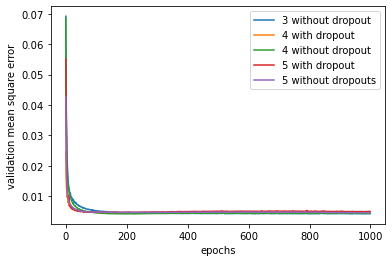

In [7]:
legend_list= ['3 without dropout', '4 with dropout', '4 without dropout', '5 with dropout', '5 without dropouts']
plt.figure(1)
for key, value in histories.items():
    plt.plot(histories[key].history['val_mse'], label=str(key))
    final_val_mse = histories[key].history['val_mse'][epochs-1]
    final_mse = histories[key].history['mse'][epochs-1]
    print('Network: %s \tMSE: %.6f \tStd: %.6f' % (legend_list[key], final_val_mse, final_mse))
plt.xlabel('epochs')
plt.ylabel('validation mean square error')
plt.legend(legend_list, loc='upper right')
plt.savefig('./plots/partb/q3/3_val_mse.png')

In [14]:
print('Final Results for different networks \n')
for i, network in enumerate(legend_list):
    final_val_mse = histories[i].history['val_mse'][epochs-1]
    final_mse = histories[i].history['mse'][epochs-1]
    final_val_loss = histories[i].history['val_loss'][epochs-1]
    final_loss = histories[i].history['loss'][epochs-1]
    print('Network: %s' % (network))
    print('Val_MSE: %.6f, MSE: %.6f, Val_Loss: %.6f, Loss: %.6f' % (final_val_mse, final_mse, final_val_loss, final_loss))
    print()

Final Results for different networks 

Network: 3 without dropout
Val_MSE: 0.004209, MSE: 0.003222, Val_Loss: 0.004570, Loss: 0.003586

Network: 4 with dropout
Val_MSE: 0.004438, MSE: 0.005207, Val_Loss: 0.005913, Loss: 0.006692

Network: 4 without dropout
Val_MSE: 0.004326, MSE: 0.003901, Val_Loss: 0.005538, Loss: 0.005119

Network: 5 with dropout
Val_MSE: 0.004960, MSE: 0.005902, Val_Loss: 0.008500, Loss: 0.009448

Network: 5 without dropouts
Val_MSE: 0.004565, MSE: 0.004291, Val_Loss: 0.008038, Loss: 0.007770

